[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorial_notebooks/3_descriptive_analytics_tasks.ipynb) 

# Tutorial 3 - Foundations of descriptive analytics
The lecture has introduced you to the field of descriptive analytics. Out of the space of descriptive analytics methods, this session concentrates on cluster analysis. We will revisit the **kMeans** algorithm and deepen our understanding of how it segments a given data set. This will also help us to introduce more Python functionality and further develop our understanding of Python programming and relevant libraries. 

Here is the outline of the demo notebook:
*   Generating data for cluster analysis 
*   kMeans Algorithm using sklearn
*   Finding the optimal "k"


Before moving on, let us import some Python libraries with useful functionality for our clustering demo.

In [ ]:
# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cluster Analysis

Cluster analysis is an example of unsupervised machine learning. Clustering algorithms group observations based on their similarities in features values. In the end, humans need to characterize found clusters and how they differ from one another. That task is often challenging and **not supported by clustering algorithms**. Instead, we must rely on domain expertise. 

## Data Generation for cluster analysis

We begin with illustrating clustering using synthetic data. Abstracting from a specific application by using synthetic data allows us to focus on algorithmic steps and illustrate a vanilla unsupervised learning workflow. 

To generate data, we use the function `make_blob()` from the `sklearn.datasets` package. In a nutshell, we generate data from two Gaussian distributions. The `make_blob()` function allows specifying the parameters of these Gaussians. This way, we can decide how similar or how dissimilar we want our data to be. Have a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to appreciate the full functionality of the function. 

Below, we first import the `make_blob()` function. This import is crucial and allows us to work with the function in the reminder. Afterwards, we print the function's documentation. Note the call to the `help()` function. Many Python editors will show you the documentation of a function when hovering over the function name. Hence, it will normally not be necessary to call `help()` explicitly, as done below. Try out how you can get your editor to display a tooltip with the function documentation. 

In [1]:
# Generate data in two dimensions using make_blobs:

# 1. Import the function to generate data
from sklearn.datasets import make_blobs

# 2. Print out the documentation of the function to see how it is to be used
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or array-like of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_sampl

##### Mini-Task
Based on the documentation of `make_blobs()` write code to call the function. Specifically, 
1. Introduce two variables that store the number of synthetic data points and their dimensionality. 
2. Set these variables to create a synthetic data set of 500 points with dimension 2
3. Call the function. Set its arguments `n_samples` and `n_features` to the variables defined in step 1
4. Store the output of the function in other variable `data`. 

Make sure you understand the output. If in doubt, note that the function documentation comments on the output that is returned to the caller.


In [2]:
# To be completed in the tutorial
from sklearn.datasets import make_blobs

# --- Steps 1 & 2: Define Variables ---
# Introduce variables for the number of data points and dimensionality
# Setting them to 500 points and dimension 2 as requested
num_samples = 500
num_features = 2

# --- Steps 3 & 4: Call Function and Store Output ---
# Call make_blobs using the variables as arguments
# Store the result in the variable 'data'
data = make_blobs(n_samples=num_samples, n_features=num_features)

# --- Verification (Understanding the Output) ---
# The 'data' variable is a tuple containing (X, y)
# X = The generated samples (coordinates)
# y = The integer labels for cluster membership
print(f"Output type: {type(data)}")
print(f"Shape of features (data[0]): {data[0].shape}") # Should be (500, 2)
print(f"Shape of labels (data[1]): {data[1].shape}")   # Should be (500,)

Output type: <class 'tuple'>
Shape of features (data[0]): (500, 2)
Shape of labels (data[1]): (500,)


##### Mini-Task
Provided you solved the previous task, you now have access to a variable storing your synthetic data set. We assume this variable is called `data`. To better understand the data:
- create a scatter plot depicting your two-dimensional data
- make sure that data points from different clusters have different color

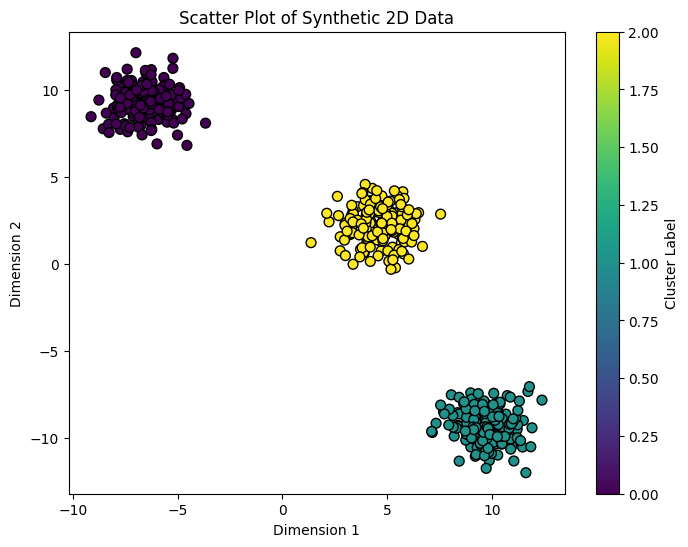

In [3]:
import matplotlib.pyplot as plt

# --- 1. Unpack the Data ---
# data[0] contains the X, Y coordinates (features)
# data[1] contains the cluster ID for each point (labels)
X = data[0]
y = data[1]

# --- 2. Create the Scatter Plot ---
plt.figure(figsize=(8, 6))

# plt.scatter arguments:
# x-axis: X[:, 0] (First column of features)
# y-axis: X[:, 1] (Second column of features)
# c=y: Maps the color of each point to its cluster label
# cmap='viridis': Sets the color scheme
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

# --- 3. Labels and Title ---
plt.title("Scatter Plot of Synthetic 2D Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add a color bar to interpret the clusters
plt.colorbar(label='Cluster Label')

plt.show()

##### Mini-Task
The scatter plots shows that, without explicitly deciding on the number of clusters, you *somehow* created synthetic data comprising three clusters. Your next task is to revise your call to the `make_blobs()` function and exert more control over the data that is being created. Specifically, 

1. Overwrite the variable `data` by calling once more the function `make_blobs()`
2. Configure the function call such that you can explicitly determine  
   a) the number of clusters (set it to 2), and  
   b) the spread of each cluster.

In the end, you should have created 2-dimensional synthetic data stemming from two clusters. Verify this by creating another scatter plot with color coding of data points from different clusters. 

>Hint: examine the argument `center` in the documentation of `make_blobs()` 

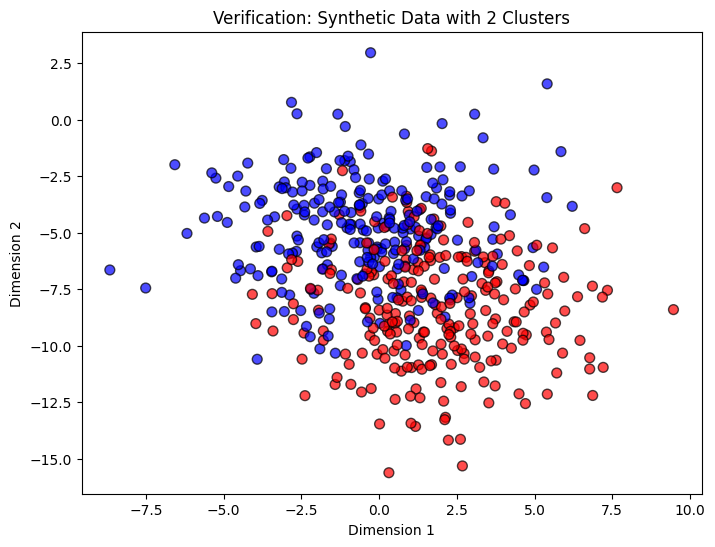

In [4]:
# To be completed in the tutorial
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# --- Step 1: Overwrite 'data' with explicit control ---
# centers=2: explicitly sets the number of clusters to 2 (Requirement a)
# cluster_std=2.5: controls the spread/variance of the clusters (Requirement b)
data = make_blobs(n_samples=500, 
                  n_features=2, 
                  centers=2, 
                  cluster_std=2.5) 

# --- Step 2: Verify with Visualization ---
# Unpack the new data
X = data[0]
y = data[1]

plt.figure(figsize=(8, 6))

# Create the scatter plot
# Using a different colormap ('bwr') to distinctly show the two groups
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50, alpha=0.7)

plt.title("Verification: Synthetic Data with 2 Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Based on a visual inspection, any clustering method including *kMeans* should be able to cluster the data. More specifically, in our synthetic data, we **know** exactly **how many clusters exist** and **which data point belongs to which cluster**. This is precisely the information that would not be availble in a realistic setting. Rather, the very job of clustering would be to find out how many clusters exist and which data point belongs to which cluster. This is the beauty of synthetic data. Knowing the desired - *true* - outcome of clustering allows us to assess the output of a clustering method. 

Before moving on with *kMeans*, recall that this algorithm is based on *centroids*. A centroid is the midpoint of a cluster. 

##### Mini-Task
Let's exploit the fact that we know the true clusters in our synthetic data. Specifically:
- compute the mean of each cluster (note this is a 2-d vector)
- store the means in a list called `true_centroids`

Solving this tasks allows us to later compare the true centroids to the centroids that *kMeans* has found. 

In [ ]:
# To be completed in the tutorial


Are the means consistent with your expectation? Why or why not?

# The kMeans algorithm

The kMeans algorithm is an established and widely used method for clustering. Much more sophisticated algorithms exist, many of which are readily available in Python libraries. However, it is good practice to start simple. For the purpose of BADS, knowing kMeans and what clustering in general can do for us is enough. 

kMeans belongs to the family of non-hierarchical cluster analysis methods. We discussed its functioning in the lecture using, amongst others, the below illustration. 

<img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/kmeans.png" width="1280" height="720" alt="kMeans Algorithm">

## kMeans with sklearn

As with most popular machine learning algorithms, the library `sklearn` provides an implementation. We simply have to import the `KMeans` function from `sklearn.cluster`.

The documentation for this function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Once you create a `KMeans` object, you can use many methods and attributes to fit, predict and evaluate your model.

##### Mini-Task
- Execute the *kMeans* algorithm based on the above information
    - Set the parameter k to 2 (we know our data has 2 clusters)
    - Ensure the algorithms works like explained in the above illustration, that is by starting with selecting *k* centroids **at random**
- Compare the centroids estimated by *kMeans* with the true_centroids determined above


In [ ]:
# To be completed in the tutorial





In [ ]:
# Here are a few more examples of useful properties that you can query from the fitted kMans object.
# Note this code will not work unless you solved the previous tasks

print(f'Number of kMeans iterations: {km.n_iter_}') # the number of iterations required for stability in this solution
print(f'Value of the objective function: {km.inertia_:.2f}') # a value similar to total distance for the clusters
print('Estimated labels for the first 10 observations: ', km.labels_[:10])  

# note that km.labels_ and estimated_clusters are equivalent
if np.all(km.labels_ == estimated_clusters):
    print('We just proved that km.labels_ == estimated_clusters')
else:
    print('Ups, something went wrong. The condition m.labels_ == estimated_clusters should evaluate to true.')


#### How good is the cluster assignment?
After running *kMeans*, you can access the cluster assignment for every data point through the property `km.labels_`. 
Assuming you solved the previous mini-tasks and have created a trained kMeans clustering object, the following code should show you the cluster assignment. 

In [ ]:
km.labels_  # access cluster assignment

It would be tempting to do a quick comparison of estimated clusters to true clusters, which we know for our synthetic data. Here is an example: 

In [ ]:
y == km.labels_

Unfortunately, this easy comparison is not likely to work. We discuss in the tutorial why it does not work and how we could fix the problem. 

### Elbow method
The above part has introduced all concepts we need to apply the elbow method. Recall that the elbow method is a heuristic to determine the number of clusters, which, in reality, we would not know.

<img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/kmeans_elbow_method.png" width="1280" height="720" alt="kMeans Algorithm">

To apply this method, we can make use of the `.inertia_` attribute of a fitted `KMeans` object. 

#### Mini-Task
- Create a list that stores candidate values for the meta-parameter *k* (i.e., number of clusters)
    - Considers settings $k=1, 2, ..., 5$
- Iterate over your list and run *kMeans* for each candidate setting of *k*. 
- Store, from each run of *kMeans, the value of the objective function, that is the property `km.inertia_`, where `km` stands for your fitted `KMeans` object
- Create a line plot of *kMeans*´objective values against the corresponding number of cluster (i.e., associated candidate settings of *k*)


In [ ]:
# To be completed in the tutorial
 


We can see the sharpest kink at K=2. This is not surprising. We set up our synthetic data generation such that the data points originate from two distinct clusters. 

### Further studies
To deepen your understanding of this demo, you could add a coding cell and copy key parts of the demo to this cell, including the generation of synthetic data, its visualization in a scatter plot, the execution of kMeans across different settings of *k* and the elbow curve. This would allow you to easily rerun all steps with different data sets, and to investigate changes in the data affect *kMeans*, and how such effects can be mitigated by adjusting meta-parameters of the *kMeans* algorithm.

Another idea would be to examine how the *kMeans* algorithm itself can be implemented. While `sklearn`provides a powerful, ready-to-use implementation, the *kMeans* algorithm is quite easy to understand and implement from scratch. Recall that the lecture slides provide a pseudo-code description on which you could draw. Implementing an algorithm yourself is highly useful to fully understand how it works. You can also find many from-scratch-implementation on the internet. We also provide one in our [GitHub repo](https://github.com/Humboldt-WI/bads/blob/master/algorithms_from_scratch/kmeans.ipynb).

# Conclusion

*kMeans* is just one out of many powerful clustering algorithms. However, each cluster method performs descriptive analytics in that it groups data points into homogeneous subgroups. Hence, the output that you can expect from any cluster method is pretty much the same that we illustrated here for the case of *kMeans*. 

Here is a quick overview of useful `sklearn` functions for synthetic data creation and `KMeans`:

| Goal | `sklearn` Implementation |
| --- | --- |
| Generate distinct groups of data | `make_blobs(n_samples=n, centers=k, cluster_std=std)` |
| Generate kMeans | `KMeans(n_clusters=k)` |
| Fit and predict model on new data | `model_name.fit_predict(X)` |
| Predict model on new data | `model_name.predict(X)` |
| Get centroid coordinates | `model_name.cluster_centers` |
| Total distance in model | `model_name.inertia_` |
| Number of iterations to achieve stability | `model_name.n_iter_` |
| Labels for training data| `model_name.labels_` |

Check the documentation for each function to see all the potential additional options which can be very useful for your specific needs.